# Milestone 2 - Independent Project
Version: Jun-2019

## Author - Mandar Pophali

## Instructions

# Milestone 1

1. Generate a clear statement problem and provide location for dataset
2. Provide a clear solution to the problem for a non-technical audience
3. Visually explore the data to generate insight and include charts and summary statistics

(Based on the comments from Milestone 1 review, I have added additional comments on the visulizations in the notebook)

# Milestone 2
4. Identify a likely distribution for several of the features;
5. Compute basic summary statistics by both classical, bootstrap, and Bayesian methods;
6. Compute confidence intervals for the above summary statistics by classical, bootstrap, and Bayesian methods.
7. Leverage confidence intervals in performing hypothesis tests to determine if the differences in
   pairs and multiple populations are significant.

# Milestone 1

## Abstract: This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.  

## Problem: What are the top home features which will attract maximum sales price. 


## Conclusions:

#### Avg mean size of the home is ~1800-2200 sqft with 40000 sqft lot, 3 bedrooms and 2.75 baths
#### Price has strong correlation with sqft_living and bathrooms/bedrooms
#### April-Oct is the busiest season for the home sales in King county
#### 98103,98038,98115,98052,98117 are most top 5 sought after king county areas for home buyers. They are also amoung the costly areas as per pricepersqft numbers
#### Basement is more common in muti-storied (2.5 or 3 floors) homes. 


In [2]:
# Location of dataset: https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/kc_house_data.csv


In [5]:
# Load necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
#load the dataset
home_df = pd.read_csv("https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/kc_house_data.csv")
home_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
home_df.describe()

In [ ]:
#dataset cleaning and removing duplicates
#convert date into datetime object
home_df['date'] = [x.strip('T000000') for x in home_df['date']]
home_df['date'] = pd.to_datetime(home_df['date'], format='%Y%m%d')#convert object to datefomat
# home_df['id'].nunique() = 21436. it means there are 177 duplicate entries in the dataset.
#its quite possible that many of them were sold more than 1 times. For consistancy, remove the duplicate rows
home_df.drop_duplicates('id',inplace=True)
home_df.reset_index(inplace=True)
home_df.info()

# How is the distribution of home size(Sqft_living and sqft_lot) and bedrooms 

In [ ]:
#plot univariate plots for home size/home lot and bedrooms
f,(ax1,ax2,ax3,ax4)=plt.subplots(4,1,figsize=(15,20))
sns.set(color_codes=True)
ax1.set_xlim(0,10000)
ax2.set_xlim(0,150000)
ax3.set_xlim(0,9)
ax4.set_xlim(0,9)
sns.distplot(home_df['sqft_living'],color='r',ax=ax1)
sns.kdeplot(home_df['sqft_lot'],color='b',ax=ax2)
sns.distplot(home_df['bedrooms'],color='g',ax=ax3)
sns.distplot(home_df['bathrooms'],color='g',ax=ax4)

# How is the relationship between price and other features like bedrooms/bathrooms and size of home

In [ ]:
#plot relationships for home sale data
sns.pairplot(home_df, 
             vars=["price","bedrooms","bathrooms","sqft_living"],
             hue="condition")

# How is the relationship between price and other features like lot size/basement size and sqft above

In [ ]:
#plot relationships for home sale data
sns.pairplot(home_df, 
             vars=["price","sqft_lot","sqft_basement","sqft_above"],
             hue="condition")

# what is the correlation map between feature set.

In [ ]:
#find correlation using heatmap
#price has strong co-relation(>0.67) with sqft_living,grade,
#price has medium co-relation (<0.67) with #bedrooms, Bathrooms,view, sqft_above, sqft_basement
#price has no or loose (<0.3)co-relaton with lot size, floors, waterfront,condition
corrmat = home_df.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f', cmap = "summer")
plt.show()

# What month are busiest during the year

In [ ]:
#Spring (April-Oct) and Summer months are high sales months 
#Add month of sales column to the dataframe
home_df['month_date'] = home_df['date'].dt.month_name()

f,ax=plt.subplots(figsize=(15,5))
sns.countplot(x='month_date',data=home_df,hue='bedrooms',order=['January','February','March','April','May','June','July','August','September','October','November','December'],ax=ax)

## Relation between price and size

In [ ]:
#f,ax=plt.subplots(figsize=(15,5))
sns.lmplot(x='sqft_living', y='price', data=home_df,hue='waterfront')

In [ ]:
#f,ax=plt.subplots(figsize=(15,5))
sns.lmplot(x='floors', y='price', data=home_df,hue='bedrooms')

## what areas see high volume of sales

In [ ]:
f,ax=plt.subplots(figsize=(15,5))
sns.countplot(x='zipcode',data=home_df,hue='waterfront',order=home_df['zipcode'].value_counts().index,ax=ax)
plt.xticks(rotation=90)

In [ ]:
f,ax=plt.subplots(figsize=(35,5))
sns.countplot(x='yr_built',data=home_df,ax=ax)
plt.xticks(rotation=90)

## Which areas are cheaper vs costlier in the region

In [ ]:
#add pricepersqft to the dataframe
home_df['pricepersqft'] = home_df['price']/home_df['sqft_living']
ax = plt.figure(figsize=(30, 6)).gca() # define axis
home_df.groupby([pd.Grouper(key='zipcode')])['pricepersqft'].count().plot.bar(ax=ax)

# How much impact basement area has on the price 

In [ ]:
#add column which provides indicator if home as basement or not
home_df.loc[home_df.loc[:, "sqft_basement"] > 0, "sqft_basement_Ind"] = 1
home_df.loc[home_df.loc[:, "sqft_basement"] == 0, "sqft_basement_Ind"] = 0

In [ ]:
home_df['sqft_basement_Ind'].value_counts(0)

In [ ]:
h={0:"red",1:"green"}
i={"marker":["^","v"]}

g=sns.FacetGrid(home_df,col_wrap=6,
                col="floors",
                hue="sqft_basement_Ind", 
                margin_titles=True,
                palette=h,
                hue_kws=i)

g.map(plt.scatter,"bedrooms","pricepersqft",alpha=0.8)
g.add_legend()
plt.xlim(-1,10)

# Milestone 2

### -Identify a likely distribution for several of the features

In [ ]:
#plot univariate plots for sqft_living/Price/condition/grade
f,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(5,1,figsize=(15,20))
sns.set(color_codes=True)
ax1.set_xlim(0,10000)
ax2.set_xlim(0,8500000)
#ax3.set_xlim(0,9)
ax4.set_xlim(0,250000)
sns.distplot(home_df['sqft_living'],color='r',ax=ax1)
sns.distplot(home_df['price'],color='b',ax=ax2)
sns.distplot(home_df['sqft_above'],color='g',ax=ax3)
sns.kdeplot(home_df['sqft_lot'],color='g',ax=ax4)
sns.distplot(home_df['sqft_basement'],color='g',ax=ax5)

1. Sqft_living/Price/Sqft_above looks like normal distributions but we will make further tests to establish right distribution.
2. sqft_lot does not look like normal and has many peaks. We will review the right distribution

In [ ]:
#function to plot histogram 
def hist_plot(vec, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.ylabel('Frequency')
    plt.xlabel('Value')
    
def plot_pop(a, b, cols=['pop_A', 'pop_B'], nbins = 100):
    import matplotlib.pyplot as plt
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_plot(a, bins)
    plt.title('Histograme of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins=int(nbins/3.5))

#function to plot qq_plot
def qq_plot(vec1, vec2,cols=['pop_A', 'pop_B']):
    import matplotlib.pyplot as plt
    import scipy.stats as ss
    plt.figure(figsize=(6, 6)).gca() # define axis
    ax1 = plt.subplot(221) ## setup the left subplot
    ss.probplot(vec1, plot = ax1) ## Plot the left subplot
    ax1.set_xlabel(cols[0])
    ax1 = plt.subplot(222) ## Set up the right subplot
    ss.probplot(vec2, plot = ax1) ## Plot the right subplot
    ax1.set_xlabel(cols[1])

In [ ]:
#Check sqft_living and Log sqft_living
homesize = home_df['sqft_living']
log_homesize = np.log10(home_df['sqft_living']) #log to the base 10 price
plot_pop(homesize, log_homesize,cols=['homesize', 'log_homesize'])
print(homesize.mean())
print(log_homesize.mean())
qq_plot(homesize, log_homesize,cols=['homesize', 'log_homesize'])

In [ ]:
from sklearn.preprocessing import scale
def ks_test(dat, dist = 'norm'):
    from scipy.stats import kstest 
    ks_statisic, pvalue = kstest(dat, dist)
    print('KS-statistic = ' + str(ks_statisic))
    print('P-value = ' + str(pvalue))

In [ ]:
ks_test(scale(homesize.astype(float)))

In [ ]:
ks_test(scale(log_homesize.astype(float)))

1. sqft_living is not normal distribtion considering very low P value and KS statitics is also low. 
2. log value of sqft_living is close to normal. We will use this for further analysis now.

In [ ]:
#Check price and Log price
homeprice = home_df['price']
log_homeprice = np.log10(home_df['price']) #log to the base 10 price
plot_pop(homeprice, log_homeprice)
print(homeprice.mean())
print(log_homeprice.mean())
qq_plot(homeprice, log_homeprice,cols=['homeprice', 'log_homeprice'])

In [ ]:
ks_test(scale(homeprice.astype(float)))

In [ ]:
ks_test(scale(log_homeprice.astype(float)))

The home price is not coming close to normal but looking at the graph above there is a long tail for home price. Lets ignore the long tail for the purpose of normalization and check the distribution 

In [ ]:
homeprice = home_df[home_df['price'] <= 1200000]['price'] #select all prices less than 1200k
#homeprice = home_df['price']
log_homeprice = np.log10(homeprice) #log to the base 10 price
plot_pop(homeprice, log_homeprice)
print(homeprice.mean())
print(log_homeprice.mean())
qq_plot(homeprice, log_homeprice,cols=['homeprice', 'log_homeprice'])

In [ ]:
ks_test(scale(homeprice.astype(float)))

In [ ]:
ks_test(scale(log_homeprice.astype(float)))

The KS statistic now is more closer to normal for log price value. 

In [ ]:
#from scipy.stats import kstest
#ks_statisic, pvalue = kstest(scale(log_homeprice.astype(float)),'exponpow',(0.1,))
#print('KS-statistic = ' + str(ks_statisic))
#print('P-value = ' + str(pvalue))

In [ ]:
#Check sqft_lot and Log sqft_lot
homelot = home_df['sqft_lot']
log_homelot = np.log10(homelot) #log to the base 10
plot_pop(homelot, log_homelot)
print(homelot.mean())
print(log_homelot.mean())
qq_plot(homelot, log_homelot,cols=['homelot', 'log_homelot'])

from the qq plot above, it doesn't look like sqft_lot is anyway close to normal distribution. There is no point in calculating the KS value for normal distribution. But lets check KS value for some other distributions 

In [ ]:
#fitter package is using sum of square errors to determine best distribution. I am using some closest distributions to compare 
#log_lot
# Use this install command if you do not have this package. Uncomment and run.
#!pip install fitter #you may have to uncomment this while running. 

In [ ]:
data = scale(log_homelot)
from fitter import Fitter
f = Fitter(data,distributions=['anglit','norm','cosine','cauchy','gennorm','dweibull','dgamma','laplace','logistic','gumbel_l'])
f.fit()
f.summary()

In [ ]:
f.get_best()
#f.fitted_param['cauchy']

The best fit for log sqft_lot is cauchy with mean of -0.07 and deviation of 0.39. I can verify this using KS statistic but i am not sure what parameters to use. If you have any pointers then let me know.


# - Compute basic summary statistics & confidence intevals by both classical, bootstrap, and Bayesian methods

In [13]:
home_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
home_df.mean()

5.666784389394538
5.6665741274456005


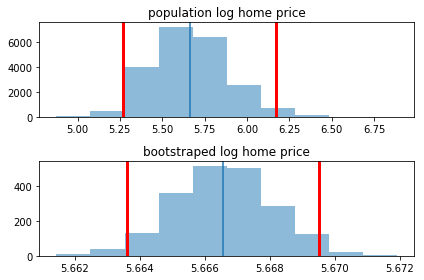

In [14]:
#calculate bootstrapped mean for home prices
n_replicas = 2000

price_bootstrap_means = pd.Series([
    np.log10(home_df['price']).sample(frac=1, replace=True).mean()
    for i in range(n_replicas)])

print(np.log10(home_df['price']).sample(frac=1, replace=True).mean())
print(price_bootstrap_means.mean())

def plot_hist(x, p=5):
    # Plot the distribution and mark the mean
    plt.hist(x, alpha=.5)
    plt.axvline(x.mean())
    # 95% confidence interval    
    plt.axvline(np.percentile(x, p/2.), color='red', linewidth=3)
    plt.axvline(np.percentile(x, 100-p/2.), color='red', linewidth=3)


def plot_dists(a, b, nbins, a_label='pop_A', b_label='pop_B', p=5):
    # Create a single sequence of bins to be shared across both
    # distribution plots for visualization consistency.
    combined = pd.concat([a, b])
    breaks = np.linspace(
        combined.min(), 
        combined.max(), 
        num=nbins+1)

    plt.subplot(2, 1, 1)
    plot_hist(a)
    plt.title(a_label)
    
    plt.subplot(2, 1, 2)
    plot_hist(b)
    plt.title(b_label)
    
    plt.tight_layout()


plot_dists(np.log10(home_df['price']), price_bootstrap_means, 
           nbins=80, a_label='population log home price', b_label='bootstraped log home price')

In [ ]:
from scipy.stats import norm
#Confidence Interval using classical method

alpha = 0.95
half_width = norm.ppf((1 + alpha)/2, loc=np.log10(home_df['price']).mean(), scale=np.log10(home_df['price']).std()) - np.log10(home_df['price']).mean()
print('The half width is %.2f' % half_width)

ci_low = np.log10(home_df['price']).mean() - half_width
ci_high = np.log10(home_df['price']).mean() + half_width

print('The %.2f level CI is (%.2f , %.2f)' % (alpha, ci_low, ci_high))

In [ ]:
#Confidence Interval using bootstrap method

alpha = 0.95
half_width = norm.ppf((1 + alpha)/2, loc=price_bootstrap_means.mean(), scale=price_bootstrap_means.std()) - price_bootstrap_means.mean()
print('The half width is %.2f' % half_width)

ci_low = price_bootstrap_means.mean() - half_width
ci_high = price_bootstrap_means.mean() + half_width

print('The actual mean is %.2f' % np.log10(home_df['price']).mean())
print('The %.2f level CI is (%.2f , %.2f)' % (alpha, ci_low, ci_high))

The bootrapped is not really having major impact on mean. One of the reasons could be that log price is close being normal distribution. The CI is much narrow for bootstrapped distribution.

In [ ]:
#calculate bootstrapped mean for home sizes

homesize_bootstrap_means = pd.Series([
    np.log10(home_df['sqft_living']).sample(frac=0.5, replace=True).mean()
    for i in range(n_replicas)])

print(np.log10(home_df['sqft_living']).sample(frac=0.5, replace=True).mean())
print(homesize_bootstrap_means.mean())

plot_dists(np.log10(home_df['sqft_living']), homesize_bootstrap_means, 
           nbins=80, a_label='population log home size', b_label='bootstraped log home size')

In [ ]:
#Confidence Interval using classical method

alpha = 0.95
half_width = norm.ppf((1 + alpha)/2, loc=np.log10(home_df['sqft_living']).mean(), scale=np.log10(home_df['sqft_living']).std()) - np.log10(home_df['sqft_living']).mean()
print('The half width is %.4f' % half_width)

ci_low = np.log10(home_df['sqft_living']).mean() - half_width
ci_high = np.log10(home_df['sqft_living']).mean() + half_width

print('The %.2f level CI is (%.2f , %.2f)' % (alpha, ci_low, ci_high))

In [ ]:
#Confidence Interval using bootstrap method

alpha = 0.95
half_width = norm.ppf((1 + alpha)/2, loc=homesize_bootstrap_means.mean(), scale=homesize_bootstrap_means.std()) - homesize_bootstrap_means.mean()
print('The half width is %.4f' % half_width)

ci_low = homesize_bootstrap_means.mean() - half_width
ci_high = homesize_bootstrap_means.mean() + half_width

print('The actual mean is %.4f' % np.log10(home_df['sqft_living']).mean())
print('The %.2f level CI is (%.4f , %.4f)' % (alpha, ci_low, ci_high))

Bootstrapped and actual means are very very close for home size. 

### lets perform Bayesian model to sqft_lot feature.
#### Problem statement: The median value of home lot (Log) is 3.88184. What is the probability of home sold in king county between May 2014 and May 2015 had home lot (log) more than the 3.88184. Technically its 50% based on the all values available in the data set But we will do the following
1. Get small sample from the original data set. Select a prior p
2. Using data, compute the likelyhood 
3. Compute the posterior and posterior distribution

In [ ]:
import scipy
homelot_sample = pd.Series(np.log10(home_df['sqft_lot']).sample(frac=0.003, replace=True))

In [ ]:
big_homelot = [1 if x > 3.88184 else 0 for x in homelot_sample]
big_homelot = np.transpose(big_homelot)
big_homelot

In [ ]:
N = len(big_homelot)  # sample size
n_big_homelot = sum(big_homelot)  # number of big lot homes
n_not = N - n_big_homelot # number not big lot homes
print('big lot homes = %d small lot homes = %d'
    '\nProbability of big lot homes = %.4f' 
      % (n_big_homelot, n_not, n_big_homelot / (n_big_homelot + n_not)))

Let's test a prior distribution for our one model parameter $p$, $P(p)$. We know a lot about home data at this point, so we will start with a cauchy distribution as indicated by fitter method above.

In [ ]:
#cauchy': (-0.07331538570584614, 0.393508174956687)}

gamma_values = [0.39, 0.7]
linestyles = ['-', '--']
mu = 0
p = np.linspace(-5, 5, 1000)
# plot the distributions
fig, ax = plt.subplots(figsize=(10, 5))

for gamma, ls in zip(gamma_values, linestyles):
    dist = cauchy(mu, gamma)

    plt.plot(p, dist.pdf(p), ls=ls, color='black',
             label=r'$\mu=%i,\ \gamma=%.4f$' % (mu, gamma))

plt.xlim(-6, 6)
plt.ylim(0, 1)

plt.xlabel('$p$')
plt.ylabel(r'$p(x|\mu,\gamma)$')
plt.title('Cauchy Distribution for home lot(log)')

plt.legend()
plt.show()

Now lets compute the likelyhood. We can view the observation of each home sold is big or not as a Bernoulli trial, so we will use the binomial distribution.

In [ ]:
def likelihood(p, data):
    k = sum(data)
    N = len(data)
    # Compute Binomial likelihood
    l = scipy.special.comb(N, k) * p**k * (1-p)**(N-k)
    # Normalize the likelihood to sum to unity
    return l/sum(l)
N = 1000
p1 = dist.cdf(p)
l = likelihood(p1, big_homelot)
plt.plot(p1, l)
plt.title('Likelihood function')
plt.xlabel('Parameter')
plt.ylabel('Likelihood')
plt.show()

In [ ]:
def posterior(prior, like):
    post = prior * like # compute the product of the probabilities
    return post / sum(post) # normalize the distribution to sum to unity

In [ ]:
def plot_post(prior, like, post, x):
    maxy = max(max(prior), max(like), max(post))
    plt.figure(figsize=(12, 4))
    plt.plot(x, like, label='likelihood', linewidth=12, color='black', alpha=.2)
    plt.plot(x, prior, label='prior')
    plt.plot(x, post, label='posterior', color='green')
    plt.ylim(-0.25, maxy+0.1)
    plt.xlim(0, 1)
    plt.title('Density of prior, likelihood and posterior')
    plt.xlabel('Parameter value')
    plt.ylabel('Density')
    plt.legend()

pp = dist.pdf(p)
post = posterior(pp, l)
plot_post(pp, l, post, p1)

In [ ]:
#calculate the credible inteval
num_samples = 1000000
lower_q, upper_q = [.025, .975]

def plot_ci(p, post, num_samples, lower_q, upper_q):
    ## This function computes a credible interval using an assumption
    ## of symetry in the bulk of the distribution to keep the 
    ## calculation simple. 
    ## Compute a large sample by resampling with replacement
    samples = np.random.choice(p, size=num_samples, replace=True, p=post)
    ci = scipy.percentile(samples, [lower_q*100, upper_q*100]) # compute the quantiles
    
    interval = upper_q - lower_q
    plt.title('Posterior density with %.3f credible interval' % interval)
    plt.plot(p, post, color='blue')
    plt.xlabel('Parameter value')
    plt.ylabel('Density')
    plt.axvline(x=ci[0], color='red')
    plt.axvline(x=ci[1], color='red')
    print('The %.3f credible interval is %.3f to %.3f' 
          % (interval, lower_q, upper_q))
    
plot_ci(p1, post, num_samples, lower_q, upper_q)

The credible interval is range from 0.31 to 0.55 (visual intepretation). The actual value (0.5) is pretty much coming between the interval range. 

# - Leverage confidence intervals in performing hypothesis tests to determine if the differences in pairs and multiple populations are significant.

### problem statement
### Take 2 samples from data for sqft_above and compare them using hypothesis testing and bootstrapping. Lastly also compare using bayesian statistics.


In [7]:
homesize_sample1 = pd.Series(np.log10(home_df['sqft_living']).sample(frac=0.1, replace=False))
homesize_sample2 = pd.Series(np.log10(home_df['sqft_living']).sample(frac=0.1, replace=False))
homelot_sample3 = pd.Series(np.log10(home_df['sqft_lot']).sample(frac=0.1, replace=False))
homelot_sample4 = pd.Series(np.log10(home_df['sqft_lot']).sample(frac=0.1, replace=False))

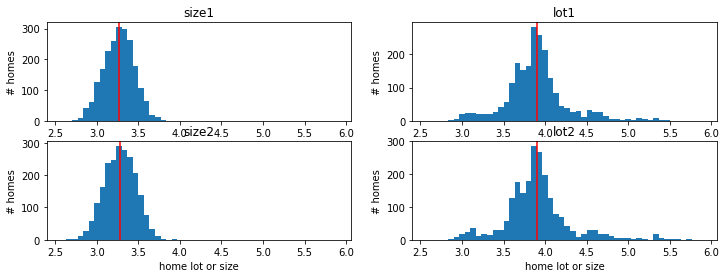

In [8]:
#classical test to check means of samples
%matplotlib inline
def hist_plot(vec, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
#    plt.figure(figsize = (4,4))
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.ylabel('# homes')
    plt.xlabel('home lot or size')
    
def plot_pop(a, b, c, d,cols=['pop_A', 'pop_B', 'pop_C','pop_D'], nbins = 50):
    import matplotlib.pyplot as plt
    minx = min([min(a), min(b), min(c), min(d)])
    maxx = max([max(a), max(b), max(c), max(d)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.figure(figsize = (12,4))
    plt.subplot(2, 2, 1) # The first plot
    hist_plot(a, bins)
    plt.title(cols[0])
    #plt.title('Histogram of ' + cols[0] + ' and ' + cols[1] + ' and '  + cols[2])
    plt.subplot(2, 2, 2) # The next plot
    hist_plot(c, bins)
    plt.title(cols[2])
    plt.subplot(2, 2, 3) # The next plot
    hist_plot(b, bins)
    plt.title(cols[1])
    plt.subplot(2, 2, 4) # The next plot
    hist_plot(d, bins)
    plt.title(cols[3])
#    plt.tight_layout()

plot_pop(homesize_sample1, homesize_sample2, homelot_sample3,homelot_sample4,cols=['size1','size2','lot1','lot2'])

As expected, the size1 and size2 samples looks very similar. The lot1 and lot2 samples are also similar. 

In [9]:
#Lets do a t-test for the 4 samples

def t_test(a, b, alpha, alternative='two-sided'):
    from scipy import stats
    import scipy.stats as ss
    import pandas as pd
    import statsmodels.stats.weightstats as ws
    
    diff = a.mean() - b.mean()

    res = ss.ttest_ind(a, b, equal_var=False)
      
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar='unequal') 
    degfree = means.dof_satt()

    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index = index)

test1 = t_test(homesize_sample1, homesize_sample2, 0.05)
test2 = t_test(homesize_sample1, homelot_sample3, 0.05)
test3 = t_test(homesize_sample1, homelot_sample4, 0.05)
test4 = t_test(homesize_sample2, homelot_sample3, 0.05)
test5 = t_test(homesize_sample2, homelot_sample4, 0.05)
test6 = t_test(homelot_sample3, homelot_sample4, 0.05)

print('homesize_sample1 & homesize_sample2')
print(test1)
print('homesize_sample1 & homelot_sample3')
print(test2)
print('homesize_sample1, homelot_sample4')
print(test3)
print('homesize_sample2, homelot_sample3')
print(test4)
print('homesize_sample2, homelot_sample4')
print(test5)
print('homelot_sample3, homelot_sample4')
print(test6)

homesize_sample1 & homesize_sample2
DegFreedom    4319.748115
Difference      -0.014218
Statistic       -2.519758
PValue           0.011779
Low95CI         -0.025281
High95CI        -0.003156
dtype: float64
homesize_sample1 & homelot_sample3
DegFreedom    3046.922495
Difference      -0.636999
Statistic      -67.387228
PValue           0.000000
Low95CI         -0.655534
High95CI        -0.618465
dtype: float64
homesize_sample1, homelot_sample4
DegFreedom    3119.545139
Difference      -0.632187
Statistic      -69.298446
PValue           0.000000
Low95CI         -0.650074
High95CI        -0.614300
dtype: float64
homesize_sample2, homelot_sample3
DegFreedom    3059.342006
Difference      -0.622781
Statistic      -65.793654
PValue           0.000000
Low95CI         -0.641341
High95CI        -0.604221
dtype: float64
homesize_sample2, homelot_sample4
DegFreedom    3132.742061
Difference      -0.617969
Statistic      -67.641155
PValue           0.000000
Low95CI         -0.635882
High95CI     

1. Sample1 and Sample2 are very similar and P values/Statistics indicate the same
2. Sample3 and Sample4 are very similar and P values/Statistics indicate the same
3. For rest of the combinations, P value is close to zero and we can reject the null hypothesis. As expected, those samples are definitetly not from same population

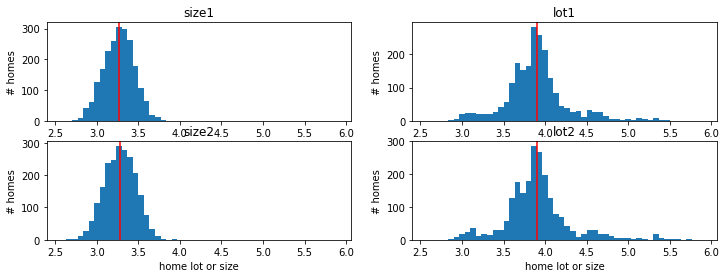

In [10]:
#Lets do Bootstrap tests for 4 samples
n_replicas = 500

sample1_bootstrap = pd.Series([
    homesize_sample1.sample(frac=1, replace=True).mean()
    for i in range(n_replicas)])
sample2_bootstrap = pd.Series([
    homesize_sample2.sample(frac=1, replace=True).mean()
    for i in range(n_replicas)])
sample3_bootstrap = pd.Series([
    homelot_sample3.sample(frac=1, replace=True).mean()
    for i in range(n_replicas)])
sample4_bootstrap = pd.Series([
    homelot_sample4.sample(frac=1, replace=True).mean()
    for i in range(n_replicas)])

plot_pop(homesize_sample1, homesize_sample2, homelot_sample3,homelot_sample4,cols=['size1','size2','lot1','lot2'])

In [11]:
#lets compare if confidence intervals for all samples overlaps zero. 
def bsMeanDiff (data1, data2):
    diffs=[]
    # Compute mean of all datasets
    all_data = data1.append(data2)
    mean_all = all_data.mean()
    # Generate shifted arrays
    data1_shifted = data1 - np.mean(data1) + mean_all
    data2_shifted = data2 - np.mean(data2) + mean_all
    # Compute 1,000 bootstrap replicates from shifted arrays
    data1_bs = pd.Series([data1_shifted.sample(frac=1, replace=True).mean() for i in range(1000)])
    data2_bs = pd.Series([data2_shifted.sample(frac=1, replace=True).mean() for i in range(1000)])
    # Get replicates of difference of means: bs_replicates
    bs_diffs = data1_bs - data2_bs
    plot_hist(bs_diffs)

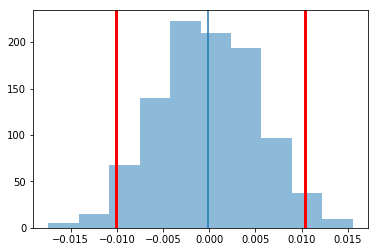

In [15]:
bsMeanDiff(homesize_sample1,homesize_sample2)

As expected, CI overlaps zero. Both samples are same.

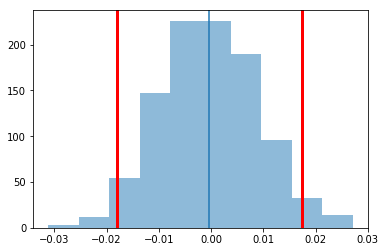

In [17]:
bsMeanDiff(homesize_sample1,homelot_sample4)

Its interesting observation. The samples are of two different features. It appears the difference in means are very close but its not overlapping with zero. But we can say that both belong to same sample since there is overlap for CI

In [291]:
#tukey HSD using actual values
from statsmodels.stats.multicomp import pairwise_tukeyhsd
df = pd.DataFrame({'vals': homesize_sample1.tolist() + homesize_sample2.tolist() + homelot_sample3.tolist() + homelot_sample4.tolist(),
                   'group_num': ['sample1'] * 2161 + ['sample2'] * 2161 + ['sample3'] * 2161 + ['sample4'] * 2161})
Tukey_HSD = pairwise_tukeyhsd(df.vals, df.group_num)
print(Tukey_HSD)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
 group1  group2 meandiff  lower  upper  reject
----------------------------------------------
sample1 sample2 -0.0036  -0.0269 0.0197 False 
sample1 sample3  0.6321   0.6088 0.6554  True 
sample1 sample4  0.632    0.6087 0.6554  True 
sample2 sample3  0.6357   0.6124 0.659   True 
sample2 sample4  0.6356   0.6123 0.659   True 
sample3 sample4 -0.0001  -0.0234 0.0233 False 
----------------------------------------------


The Tukey HSD results are on the expected lines. The sample1 and Sample2 are same. Sample3 and Sample 4 are also same. Rest of the combinations can be rejected. 

Mean of price: 0.7


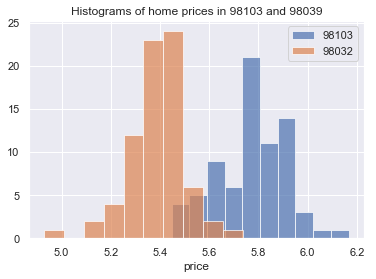

In [318]:
#Comparing Bayesian models
#problem statement: Compare prices for two zipcodes(98103,98039) in the dataset. As per EDA above, 98103 is having homes with 
#higher cost/sqft and also higher volume than 98039.
num_samples = 75
home_98103 = home_df[home_df['zipcode'] == 98103]['price'].sample(n=num_samples)
home_98032 = home_df[home_df['zipcode'] == 98032]['price'].sample(n=num_samples)
plt.title('Histograms of home prices in 98103 and 98039')
home_98103 = np.log10(home_98103)
home_98032 = np.log10(home_98032)
home_98103.hist(label='98103', bins=10, alpha=.7)
home_98032.hist(label='98032', bins=10, alpha=.7)
plt.xlabel('price')
plt.legend()

mean_price = np.concatenate([home_98103, home_98032,]).mean()
print('Mean of price: %.1f' % np.log10(mean_price))


fixed empirical estimate of the standard deviation

Mean = 5.770, Standard deviation = 0.143


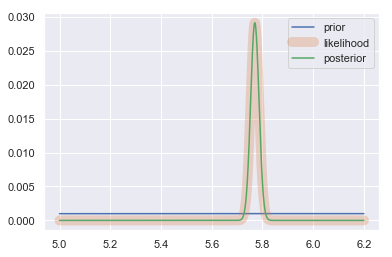

In [319]:
N = 1000
p = np.linspace(5, 6.2, num=N)

pp = scipy.stats.norm.pdf(p, loc=home_98103.mean(), scale=5)
pp = pp / pp.sum() # normalize

def comp_like(p, x): 
    variance = np.std(x)**2 # sigmasqr
    x_mean = np.asarray(x).mean()  # xbar
    print('Mean = %.3f, Standard deviation = %.3f' % (x_mean, np.std(x)))
    n = len(x)
    l = np.exp(-n * np.square(x_mean - p) / (2 * variance))
    return l / l.sum()

like_98103 = comp_like(p, home_98103)
post_98103 = posterior(pp, like_98103)

plt.plot(p, pp, label='prior')
plt.plot(p, like_98103, label='likelihood', alpha=.3, linewidth=10)
plt.plot(p, post_98103, label='posterior')
plt.legend()
plt.show()

Mean = 5.389, Standard deviation = 0.114


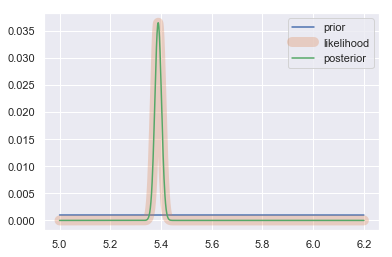

In [320]:
pp_98032 = scipy.stats.norm.pdf(p, loc=home_98032.mean(), scale=5)
pp_98032 = pp_98032 / pp_98032.sum() # normalize

like_98032 = comp_like(p, home_98032)
post_98032 = posterior(pp_98032, like_98032)

plt.plot(p, pp_98032, label='prior')
plt.plot(p, like_98032, label='likelihood', alpha=.3, linewidth=10)
plt.plot(p, post_98032, label='posterior')
plt.legend()
plt.show()

Lets compute the confidence intervals

The 0.950 credible interval is 0.025 to 0.975


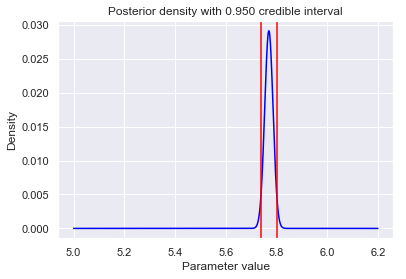

In [321]:
num_samples = 100000

plot_ci(p, post_98103, num_samples, lower_q=.025, upper_q=.975)


The 0.950 credible interval is 0.025 to 0.975


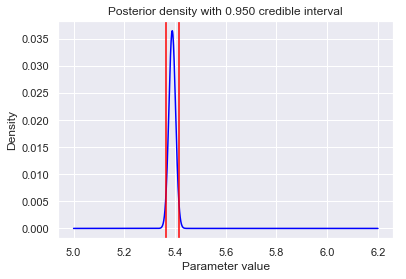

In [322]:
plot_ci(p, post_98032, num_samples, lower_q=.025, upper_q=.975)

The mean log prices are different for both zipcodes
